In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data

In [3]:
# Parameters for identifying a Doji star
doji_threshold = 0.1  # Defines the max acceptable difference between open and close
shadow_ratio = 0.5    # Minimum ratio of the longer shadow to body length

In [4]:
# Doji pattern detection function
def detect_doji_star(data, doji_threshold=doji_threshold, shadow_ratio=shadow_ratio):
    # Calculate candlestick body and shadows
    data['Body'] = abs(data['Close'] - data['Open'])
    data['Upper_Shadow'] = data['High'] - data[['Close', 'Open']].max(axis=1)
    data['Lower_Shadow'] = data[['Close', 'Open']].min(axis=1) - data['Low']

    # Conditions for a Doji pattern
    doji_condition = data['Body'] <= doji_threshold * (data['High'] - data['Low'])
    long_upper_shadow = data['Upper_Shadow'] >= shadow_ratio * data['Body']
    long_lower_shadow = data['Lower_Shadow'] >= shadow_ratio * data['Body']

    # Identify potential Doji stars
    data['Doji_Star'] = doji_condition & (long_upper_shadow | long_lower_shadow)
    
    # Filter for rows where Doji stars are detected
    doji_stars = data[data['Doji_Star']]
    return doji_stars

In [14]:
data = pd.DataFrame()
data["Close"] = pd.Series([100 + np.sin(i / 10) for i in range(300)])
data["Open"] = pd.Series([100 + np.sin(i / 15) for i in range(300)])
data["High"] = pd.Series([100 + np.sin(i / 20) for i in range(300)])
data["Low"] = pd.Series([100 + np.sin(i / 25) for i in range(300)])

# Find Doji star patterns
doji_stars = detect_doji_star(data)

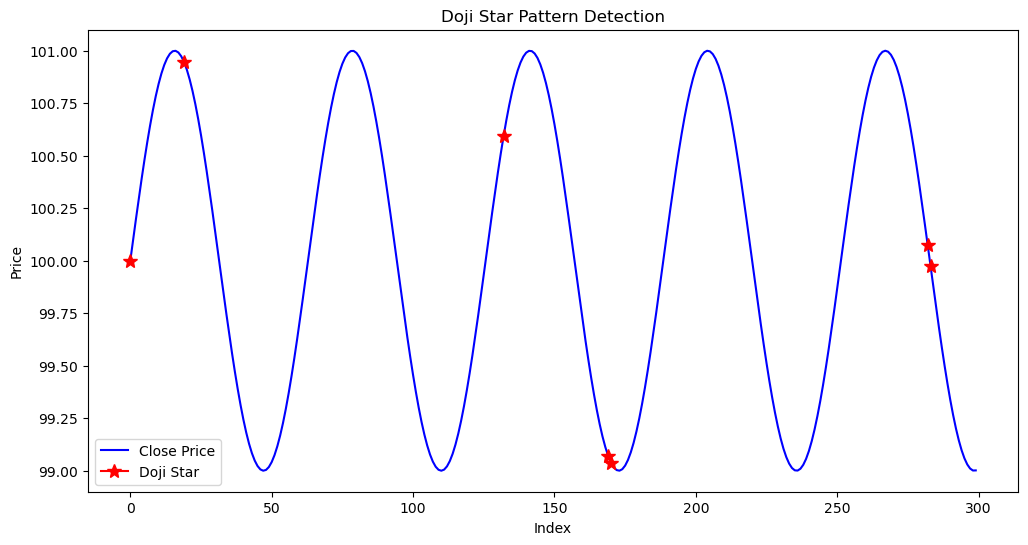

Doji Star Patterns Detected at Indices:
           Open        High         Low       Close
0    100.000000  100.000000  100.000000  100.000000
19   100.954108  100.813416  100.688921  100.946300
132  100.584917  100.311541   99.156812  100.592074
169   99.036521  100.827577  100.458951   99.070876
170   99.056500  100.798487  100.494113   99.038603
282   99.950464  100.999309   99.040177  100.074265
283  100.017110  100.999918   99.052166   99.974337


In [15]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

# Mark Doji stars on the plot
for idx in doji_stars.index:
    plt.plot(idx, data['Close'].iloc[idx], marker='*', color='red', markersize=10, label='Doji Star' if idx == doji_stars.index[0] else "")

plt.legend()
plt.title("Doji Star Pattern Detection")
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

# Display detected Doji star patterns
print("Doji Star Patterns Detected at Indices:")
print(doji_stars[['Open', 'High', 'Low', 'Close']])